In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train_labels[0]

5

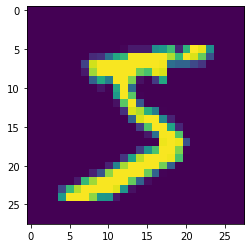

In [7]:
plt.imshow(train_images[0])
plt.show()

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
train_images.shape[0]

60000

In [10]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#casting
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# Normalizing
train_images /=255
test_images /=255

In [11]:
train_images.shape

(60000, 28, 28, 1)

In [12]:
test_images.shape

(10000, 28, 28, 1)

In [13]:
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

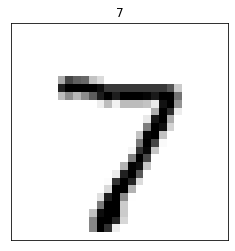

In [14]:
plt.imshow(test_images[0],cmap='gray_r')
plt.title(test_labels[0])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
train_images[0].shape

(28, 28, 1)

In [16]:
# CNN
model = models.Sequential()
model.add(layers.Conv2D(28,(3,3),activation='relu',input_shape=(28,28,1))) #28-3+1=26
model.add(layers.MaxPooling2D((2,2))) #13
model.add(layers.Conv2D(56,(3,3),activation='relu')) #13-3+1=11
model.add(layers.MaxPooling2D((2,2))) #5
model.add(layers.Conv2D(56,(3,3),activation='relu')) #5-3+1=3
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
Total params: 42,728
Trainable params: 42,728
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten (Flatten)            (None, 504)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [20]:
history = model.fit(train_images,train_labels,epochs=5,batch_size=10,validation_split=0.2)

Epoch 1/5
4800/4800 [==============================] - 66s 14ms/step - loss: 0.1366 - accuracy: 0.9582 - val_loss: 0.0526 - val_accuracy: 0.9833
Epoch 2/5
4800/4800 [==============================] - 63s 13ms/step - loss: 0.0477 - accuracy: 0.9847 - val_loss: 0.0496 - val_accuracy: 0.9858
Epoch 3/5
4800/4800 [==============================] - 64s 13ms/step - loss: 0.0331 - accuracy: 0.9899 - val_loss: 0.0445 - val_accuracy: 0.9883
Epoch 4/5
4800/4800 [==============================] - 62s 13ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0365 - val_accuracy: 0.9901
Epoch 5/5
4800/4800 [==============================] - 63s 13ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0367 - val_accuracy: 0.9911


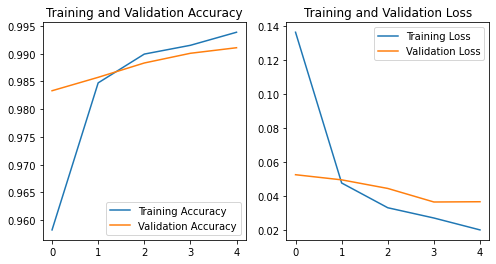

In [22]:
epochs = 5
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc=0)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc=0)
plt.title('Training and Validation Loss')
plt.show()

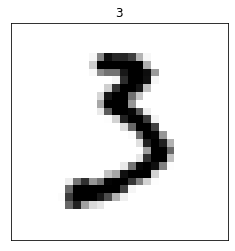

In [23]:
plt.imshow(test_images[230],cmap='gray_r')
plt.title(test_labels[230])
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
model.predict(test_images[230].reshape(1,28,28,1)).round()

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
np.argmax(model.predict(test_images[230].reshape(1,28,28,1)))

3